# DSA210 Term Project – Analysis of Work Hours, Happiness, and Mental Health

This notebook documents the full process of analyzing the relationship between working hours, happiness, and mental health. The analysis is conducted as part of the DSA210 Term Project.

The following data science workflow is followed throughout the study:
1. **Loading datasets**
2. **Initial exploration and data cleaning**
3. **Exploratory Data Analysis (EDA)**
4. **Statistical hypothesis testing**
5. **Visualization of findings**
6. **Discussion of results and limitations**

### Data Sources:
The datasets are obtained from *Our World in Data* and include:
- `Annual Working Hours`: average annual working hours per person employed.
- `Mental Health Burden`: DALYs (Disability-Adjusted Life Years) related to mental disorders.
- `Happiness`: survey-based data indicating the share of people who describe themselves as happy.
- `Life Satisfaction`: survey data on self-reported life satisfaction levels.

The objective of this analysis is to examine whether excessive working hours are associated with lower levels of happiness and increased mental health challenges.


In [1]:
# Importing required libraries
import pandas as pd

# Defining base path for the data files
base_path = r'C:\Users\7981\Desktop\DSA201\DSA210-Term-Project-Spring2025\data'

# Loading datasets
df_work = pd.read_csv(base_path + r'\annual-working-hours-per-person-employed.csv')
df_mental = pd.read_csv(base_path + r'\mentaldisorders.csv')
df_happy = pd.read_csv(base_path + r'\share-of-people-who-say-they-are-happy.csv')
df_satisfy = pd.read_csv(base_path + r'\share-of-people-who-say-they-are-satisfied.csv')


## 1. Preview of Each Dataset
Let's look at the first few rows of each dataset to understand their structure.


In [2]:
# Previewing datasets

print("Working Hours Data:")
display(df_work.head())

print("Mental Health Disorders Data:")
display(df_mental.head())

print("Happiness Data:")
display(df_happy.head())

print("Life Satisfaction Data:")
display(df_satisfy.head())


Working Hours Data:


,Entity,Code,Year,Subject:Average hours worked per person employed - PDB_LV
0,Australia,AUS,1970,1864.935951
1,Australia,AUS,1971,1847.040484
2,Australia,AUS,1972,1827.516925
3,Australia,AUS,1973,1814.705069
4,Australia,AUS,1974,1831.279122


Mental Health Disorders Data:


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,55,Slovenia,3,Both,22,All ages,558,Mental disorders,1,Number,2021,5.638814e-05,6.509461e-05,2.776283e-05
1,1,Deaths,55,Slovenia,3,Both,22,All ages,558,Mental disorders,2,Percent,2021,2.439168e-09,2.801477e-09,1.208993e-09
2,1,Deaths,55,Slovenia,3,Both,22,All ages,558,Mental disorders,3,Rate,2021,2.724524e-06,3.145197e-06,1.341425e-06
3,1,Deaths,55,Slovenia,3,Both,22,All ages,572,Eating disorders,1,Number,2021,5.638814e-05,6.509461e-05,2.776283e-05
4,1,Deaths,55,Slovenia,3,Both,22,All ages,572,Eating disorders,2,Percent,2021,2.439168e-09,2.801477e-09,1.208993e-09


Happiness Data:


,Entity,Code,Year,Happiness: Happy (aggregate),821407-annotations
0,Albania,ALB,1998,33.43343,NaN
1,Albania,ALB,2004,58.80000,NaN
2,Albania,ALB,2010,66.85212,NaN
3,Albania,ALB,2022,73.92710,NaN
4,Algeria,DZA,2004,80.73323,NaN


Life Satisfaction Data:


,Entity,Code,Year,Share of people who are happy (Eurobarometer 2017)
0,Albania,ALB,2014,58.685448
1,Albania,ALB,2015,62.037964
2,Albania,ALB,2016,59.073544
3,Austria,AUT,1996,93.234474
4,Austria,AUT,1997,83.727531


## 2. Dataset Overview: Dimensions, Column Names, and Missing Values

This section provides a structural overview of the datasets:
- Number of rows and columns in each dataset
- Column names to understand available variables
- Presence of missing values that may require further cleaning


In [4]:
# Checking dataset shapes
print("Dataset Shapes:")
print("Working Hours:", df_work.shape)
print("Mental Disorders:", df_mental.shape)
print("Happiness:", df_happy.shape)
print("Life Satisfaction:", df_satisfy.shape)

# Checking column names
print("\nColumn Names:")
print("Working Hours:", df_work.columns.tolist())
print("Mental Disorders:", df_mental.columns.tolist())
print("Happiness:", df_happy.columns.tolist())
print("Life Satisfaction:", df_satisfy.columns.tolist())

# Checking missing values
print("\nMissing Value Counts:")
print("Working Hours:\n", df_work.isnull().sum())
print("\nMental Disorders:\n", df_mental.isnull().sum())
print("\nHappiness:\n", df_happy.isnull().sum())
print("\nLife Satisfaction:\n", df_satisfy.isnull().sum())


Dataset Shapes:
Working Hours: (1568, 4)
Mental Disorders: (31356, 16)
Happiness: (423, 5)
Life Satisfaction: (809, 4)

Column Names:
Working Hours: ['Entity', 'Code', 'Year', 'Subject:Average hours worked per person employed - PDB_LV']
Mental Disorders: ['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id', 'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id', 'metric_name', 'year', 'val', 'upper', 'lower']
Happiness: ['Entity', 'Code', 'Year', 'Happiness: Happy (aggregate)', '821407-annotations']
Life Satisfaction: ['Entity', 'Code', 'Year', 'Share of people who are happy (Eurobarometer 2017)']

Missing Value Counts:
Working Hours:
 Entity                                                         0
Code                                                         155
Year                                                           0
Subject:Average hours worked per person employed - PDB_LV      0
dtype: int64

Mental Disorders:
 measure_id       0
measure_

### 3.1 Happiness Dataset Cleaning

This section focuses on cleaning the happiness dataset.

- The column `821407-annotations` contains no usable information and will be removed.
- The main value column `Happiness: Happy (aggregate)` will be renamed to `Happiness` for simplicity.
- The column names will be standardized to allow easier merging and analysis.


In [ ]:
# Copying original to avoid modifying raw data
df_happy_cleaned = df_happy.copy()

# Dropping empty annotation column
df_happy_cleaned.drop(columns=['821407-annotations'], inplace=True)

# Renaming column for simplicity
df_happy_cleaned.rename(columns={
    'Happiness: Happy (aggregate)': 'Happiness'
}, inplace=True)

# Save the cleaned happiness dataset
df_happy_cleaned.to_csv('cleaned_data/happiness_cleaned.csv', index=False)


### 3.2 Life Satisfaction Dataset Cleaning

This section handles the cleaning of the life satisfaction dataset.

- The dataset contains the percentage of people who say they are satisfied with their life.
- The column `Share of people who are happy (Eurobarometer 2017)` will be renamed to `LifeSatisfaction`.
- The column `Code` contains missing values but is not essential for our analysis, so it will be kept as is.


In [ ]:
# Copy original
df_satisfy_cleaned = df_satisfy.copy()

# Rename column for simplicity
df_satisfy_cleaned.rename(columns={
    'Share of people who are happy (Eurobarometer 2017)': 'LifeSatisfaction'
}, inplace=True)

# Save the cleaned version
df_satisfy_cleaned.to_csv('cleaned_data/life_satisfaction_cleaned.csv', index=False)


### 3.3 Working Hours Dataset Cleaning

This section focuses on cleaning the working hours dataset.

- The column `Subject:Average hours worked per person employed - PDB_LV` will be renamed to `WorkingHours` for clarity and ease of use.
- The column `Code` contains missing values, but since `Entity` and `Year` are sufficient for merging and analysis, no rows will be dropped.



In [9]:
# Copying original
df_work_cleaned = df_work.copy()

# Rename the long column name
df_work_cleaned.rename(columns={
    'Subject:Average hours worked per person employed - PDB_LV': 'WorkingHours'
}, inplace=True)

df_work_cleaned.to_csv('cleaned_data/working_hours_cleaned.csv', index=False)


### 3.4 Mental Health Dataset Cleaning

The mental health dataset includes disease burden indicators by country, year, sex, age group, and disorder type.

To make it suitable for analysis:
- The dataset is filtered by:
  - `measure_name`: DALYs (Disability-Adjusted Life Years)
  - `metric_name`: Rate (DALYs per 100,000 population)
  - `sex_name`: Both
  - `age_name`: All ages
  - `cause_name`: Mental disorders
- The cleaned dataset retains only:
  - `Entity` (renamed from `location_name`)
  - `Year`
  - `MentalHealthDALY` (renamed from `val`)


In [ ]:
# Copying the original dataset
df_mental_cleaned = df_mental.copy()

# Apply necessary filters
df_mental_cleaned = df_mental_cleaned[
    (df_mental_cleaned['age_name'] == 'All ages') &
    (df_mental_cleaned['sex_name'] == 'Both') &
    (df_mental_cleaned['cause_name'] == 'Mental disorders') 
]

# Rename columns
df_mental_cleaned = df_mental_cleaned.rename(columns={
    'location_name': 'Entity',
    'year': 'Year',
    'val': 'MentalHealthDALY'
})

# Select only necessary columns
df_mental_cleaned = df_mental_cleaned[['Entity', 'Year', 'MentalHealthDALY']]

# Preview cleaned data
df_mental_cleaned.head()

df_mental_cleaned.to_csv('cleaned_data/mental_health_cleaned.csv', index=False)

,Entity,Year,MentalHealthDALY
0,Slovenia,2021,5.638814e-05
1,Slovenia,2021,2.439168e-09
2,Slovenia,2021,2.724524e-06
6,Sudan,2018,3.506767e-03
7,Sudan,2018,1.739212e-08


### Step 1 – Country-Level Averages and Initial Visualizations

Given the temporal inconsistency across datasets—some spanning decades, others limited to a few scattered years—conducting year-based comparisons would result in significant data loss and analytic distortion.

To ensure standardized, cross-national comparison:
- The average values of **working hours**, **happiness**, **life satisfaction**, and **mental health burden (DALYs)** were calculated per country.
- These aggregated indicators provide a stable representation of each country’s typical condition, mitigating the effects of missing or inconsistent time-series data.
- The resulting values serve as unified metrics for comparative analysis, correlation testing, and visual exploration.

The visualizations below present the **top 10 countries** for each of the measured variables:
- 🔴 Highest average working hours  
- 🟢 Highest average happiness levels  
- 🔵 Highest average life satisfaction  
- 🟣 Highest average mental health burden (DALYs)


C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_work, x="WorkingHours", y="Entity", palette="Reds_d")


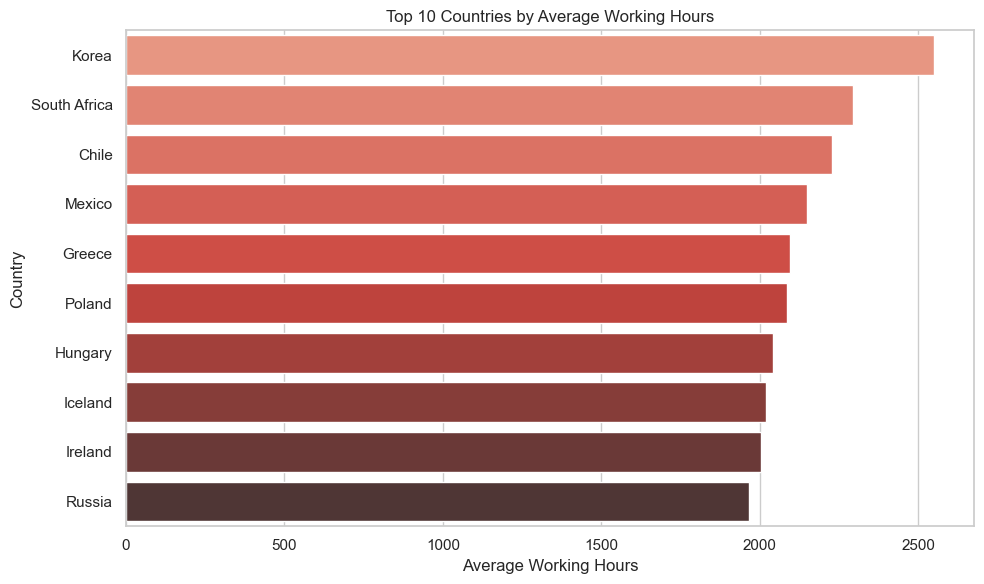

C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_happy, x="Happiness", y="Entity", palette="Greens_d")


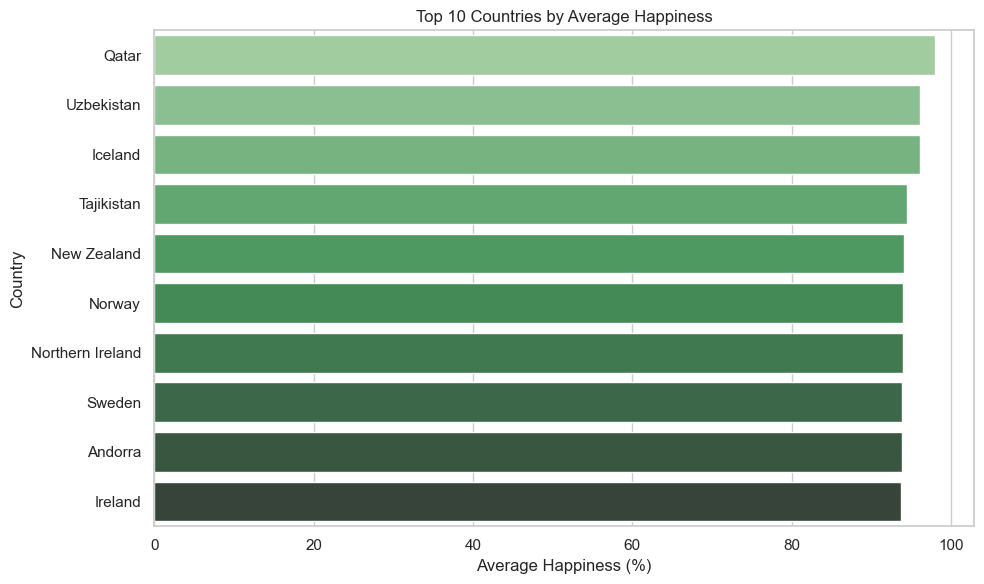

C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_satisfy, x="LifeSatisfaction", y="Entity", palette="Blues_d")


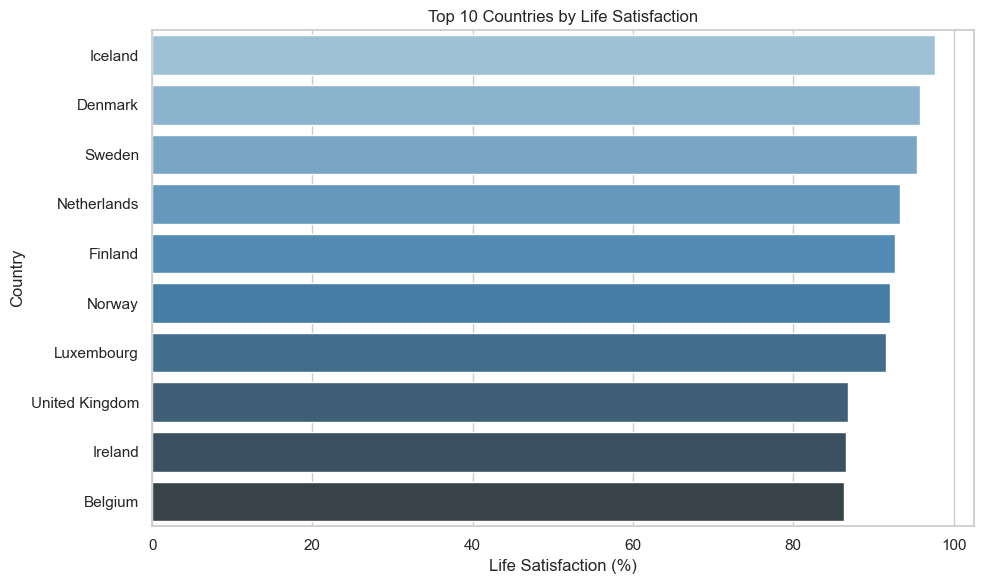

C:\Users\7981\AppData\Local\Temp\ipykernel_24456\3537790100.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mental, x="MentalHealthDALY", y="Entity", palette="Purples_d")


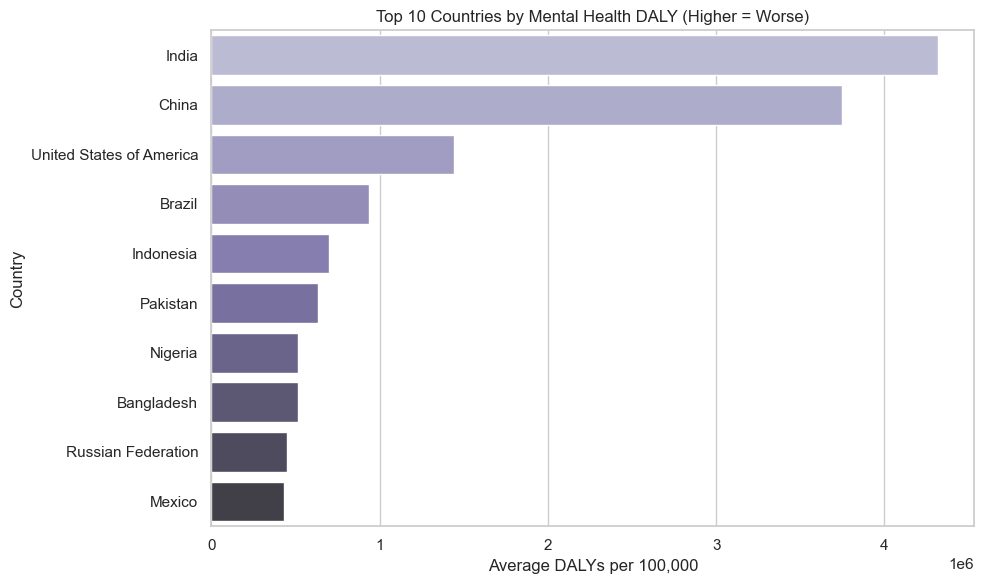

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_work_cleaned = pd.read_csv("cleaned_data/working_hours_cleaned.csv")
df_happy_cleaned = pd.read_csv("cleaned_data/happiness_cleaned.csv")
df_satisfy_cleaned = pd.read_csv("cleaned_data/life_satisfaction_cleaned.csv")
df_mental_cleaned = pd.read_csv("cleaned_data/mental_health_cleaned.csv")

df_work_avg = df_work_cleaned.groupby("Entity", as_index=False)["WorkingHours"].mean()
df_happy_avg = df_happy_cleaned.groupby("Entity", as_index=False)["Happiness"].mean()
df_satisfy_avg = df_satisfy_cleaned.groupby("Entity", as_index=False)["LifeSatisfaction"].mean()
df_mental_avg = df_mental_cleaned.groupby("Entity", as_index=False)["MentalHealthDALY"].mean()

sns.set(style="whitegrid")

# Plot 1: Top 10 countries by Working Hours
plt.figure(figsize=(10, 6))
top_work = df_work_avg.sort_values(by="WorkingHours", ascending=False).head(10)
sns.barplot(data=top_work, x="WorkingHours", y="Entity", palette="Reds_d")
plt.title("Top 10 Countries by Average Working Hours")
plt.xlabel("Average Working Hours")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 2: Top 10 countries by Happiness
plt.figure(figsize=(10, 6))
top_happy = df_happy_avg.sort_values(by="Happiness", ascending=False).head(10)
sns.barplot(data=top_happy, x="Happiness", y="Entity", palette="Greens_d")
plt.title("Top 10 Countries by Average Happiness")
plt.xlabel("Average Happiness (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 3: Top 10 countries by Life Satisfaction
plt.figure(figsize=(10, 6))
top_satisfy = df_satisfy_avg.sort_values(by="LifeSatisfaction", ascending=False).head(10)
sns.barplot(data=top_satisfy, x="LifeSatisfaction", y="Entity", palette="Blues_d")
plt.title("Top 10 Countries by Life Satisfaction")
plt.xlabel("Life Satisfaction (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 4: Top 10 countries by Mental Health DALY
plt.figure(figsize=(10, 6))
top_mental = df_mental_avg.sort_values(by="MentalHealthDALY", ascending=False).head(10)
sns.barplot(data=top_mental, x="MentalHealthDALY", y="Entity", palette="Purples_d")
plt.title("Top 10 Countries by Mental Health DALY (Higher = Worse)")
plt.xlabel("Average DALYs per 100,000")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
